In [1]:
!pip install pybullet --quiet

In [10]:
import os
import pybullet as p
import cv2
import time
import numpy as np
import pybullet_data
from google.colab.patches import cv2_imshow

In [3]:
p.connect(p.DIRECT)
p.resetSimulation()
p.setAdditionalSearchPath(pybullet_data.getDataPath())  # optionally
p.setGravity(0, 0, -9.8)
p.setRealTimeSimulation(0)

In [4]:
p.loadURDF("plane.urdf", [0, 0, 0], [0, 0, 0, 1])

0

In [5]:
cube_start_pos = [0.5, 0, 0.05]
cube_start_orientation = p.getQuaternionFromEuler([0, 0, 0])
cube_id = p.loadURDF("cube_small.urdf", cube_start_pos, cube_start_orientation)

In [6]:
targid = p.loadURDF("franka_panda/panda.urdf", [0, 0, 0], [0, 0, 0, 1], useFixedBase=True)
obj_of_focus = targid

In [7]:
numJoints = p.getNumJoints(targid)
print("numJoints=", numJoints)

numJoints= 12


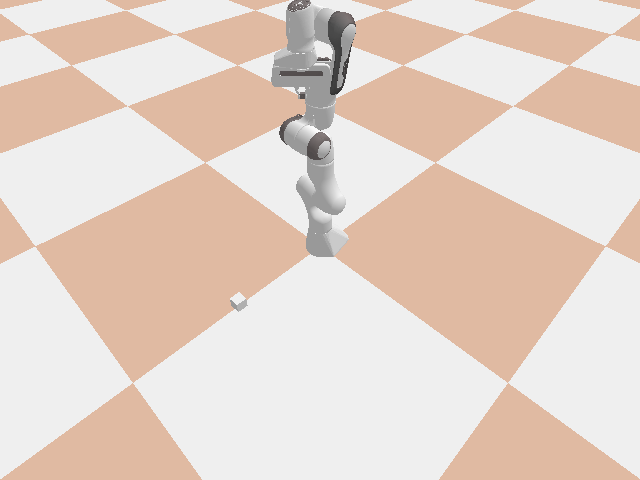

In [14]:
for step in range(10000):
    focus_pos, focus_orn = p.getBasePositionAndOrientation(obj_of_focus)
    p.resetDebugVisualizerCamera(cameraDistance=1.5, cameraYaw=45, cameraPitch=-30, cameraTargetPosition=focus_pos)
    p.stepSimulation()
    time.sleep(1. / 240.)

    width = 640
    height = 480
    viewMatrix = p.computeViewMatrix(cameraEyePosition=[1, 1, 1.5],
                                     cameraTargetPosition=focus_pos,
                                     cameraUpVector=[0, 0, 1])
    projectionMatrix = p.computeProjectionMatrixFOV(fov=60,
                                                    aspect=width/height,
                                                    nearVal=0.1,
                                                    farVal=100)

    if step % 10000 == 0:
      img = p.getCameraImage(width, height, viewMatrix, projectionMatrix)[2]
      img = np.reshape(img, (height, width, 4))
      cv2_imshow(img) # Use cv2_imshow for Colab

In [15]:
p.disconnect()